In [1]:
%matplotlib inline
import openml as oml
import seaborn as sns
import numpy as np
import pandas as pd
import sys
from scipy.stats import norm
from matplotlib import pyplot
from openml import evaluations

benchmark_suite = oml.study.get_study('OpenML-CC18','tasks') # obtain the benchmark suite

In [2]:
# Download dataset metadata
datasets = oml.datasets.list_datasets(tag='OpenML-CC18')

In [3]:
# Look at dataset metadata
dataset_names = [datasets[x]['name'] for x in datasets]
dataset_nrows = [datasets[x]['NumberOfInstances'] for x in datasets]
dataset_ncols = [datasets[x]['NumberOfFeatures'] for x in datasets]
dataset_meta = pd.DataFrame({'dataset': dataset_names, 'NumberOfInstances': dataset_nrows, 'NumberOfFeatures': dataset_ncols})

In [5]:
# Download and group the evaluation data
scores = []
for task_id in benchmark_suite.tasks: # iterate over all tasks. Can be removed if list_evaluations used paging!
    evaluations = oml.evaluations.list_evaluations(task=[task_id], function='area_under_roc_curve', size=1000)
    for id, e in evaluations.items():
        scores.append({"dataset":e.data_name, "score":e.value})

In [7]:
median_scores = pd.DataFrame(scores).groupby(['dataset']).median().sort_values('score')
median_scores

,score
dataset,
car,0.500000
climate-model-simulation-crashes,0.500000
churn,0.514818
numerai28.6,0.520248
cylinder-bands,0.522689
analcatdata_dmft,0.532562
madelon,0.542308
dresses-sales,0.553424
cmc,0.654126


In [8]:
# Merge dataset metadata with scores from above to see full picture
dataset_meta_scores = dataset_meta.merge(median_scores, on = 'dataset').sort_values('NumberOfInstances')
dataset_meta_scores = dataset_meta_scores[['dataset','NumberOfInstances','NumberOfFeatures','score']]
#dataset_meta_scores.to_csv('openml-cc18_dataset_meta_scores.csv', index=False)
dataset_meta_scores

,dataset,NumberOfInstances,NumberOfFeatures,score
38,dresses-sales,500,13,0.553424
24,kc2,522,22,0.741144
20,climate-model-simulation-crashes,540,21,0.500000
41,cylinder-bands,540,40,0.522689
70,wdbc,569,31,0.953475
54,ilpd,583,11,0.686838
3,balance-scale,625,5,0.884176
10,Australian,690,15,0.763825
17,credit-approval,690,16,0.906218
6,breast-w,699,10,0.979837


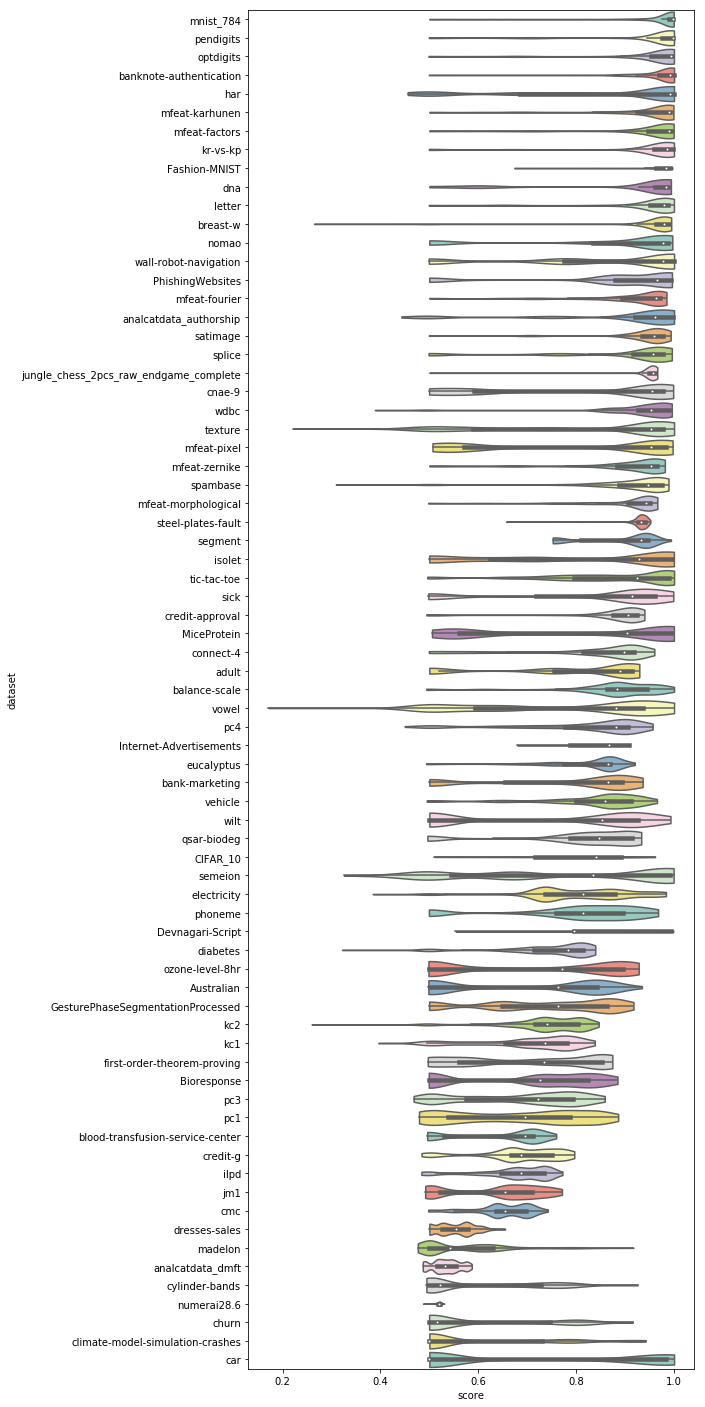

In [9]:
# plot the scores
sorted_score = sorted(scores, key=lambda x: -median_scores['score'][x["dataset"]])
fig, ax = pyplot.subplots(figsize=(8, 25))  
sns.violinplot(ax=ax, x="score", y="dataset", data=pd.DataFrame(sorted_score), scale="count", palette="Set3", cut=0);

In [10]:
def list_all(listing_call, *args, **filters):
    """Helper to handle paged listing requests.
    Example usage: evaluations = list_all(list_evaluations, "predictive_accuracy", task=mytask)

    Parameters
    ----------
    listing_call : object
        Name of the listing call, e.g. list_evaluations
    *args : Variable length argument list
        Any required arguments for the listing call
    **filters : Arbitrary keyword arguments
        Any filters that need to be applied

    Returns
    -------
    object
    """
    batch_size = 10000
    page = 0
    has_more = 1
    result = {}
    while has_more and page<=10:
        new_batch = listing_call(*args, size=batch_size, offset=batch_size*page, **filters)
        result.update(new_batch)
        page += 1
        has_more = (len(new_batch) == batch_size)
        #if has_more:
        #    print(str(page*10000)+" evaluations downloaded")
    print(len(result),"evaluations downloaded")
    return result

In [11]:
# Limited to Random R Bot runs (uploader 2702)
tasks = []
all_scores = []
benchmark_suite = oml.study.get_study('OpenML-CC18','tasks') # obtain the 73 tasks

for count, task_id in enumerate(benchmark_suite.tasks): # iterate over all tasks to fetch their evaluations
    print("Fetching evaluations for task ",task_id,"-",count,"%")
    try:
        evaluations = list_all(oml.evaluations.list_evaluations, task=[task_id], uploader=[2702], function='area_under_roc_curve')
        for id, e in evaluations.items():
            tasks.append(e.data_name)
            all_scores.append(e.value)
    except oml.exceptions.OpenMLServerException as e: # to be sure that no server/network issues occurred
        print("OpenML error:", str(e),"for task",task_id)

# Create dataframe and sort by median over individual tasks
df = pd.DataFrame(dict(x=all_scores, g=tasks))
df['g'] = pd.Categorical(df['g'], df.groupby(['g']).median().sort_values('x').index.tolist())
df.sort_values('g');

('Fetching evaluations for task ', 3, '-', 0, '%')
(110000, 'evaluations downloaded')
('Fetching evaluations for task ', 6, '-', 1, '%')
(0, 'evaluations downloaded')
('Fetching evaluations for task ', 11, '-', 2, '%')
(0, 'evaluations downloaded')
('Fetching evaluations for task ', 12, '-', 3, '%')
(0, 'evaluations downloaded')
('Fetching evaluations for task ', 14, '-', 4, '%')
(0, 'evaluations downloaded')
('Fetching evaluations for task ', 15, '-', 5, '%')
(0, 'evaluations downloaded')
('Fetching evaluations for task ', 16, '-', 6, '%')
(0, 'evaluations downloaded')
('Fetching evaluations for task ', 18, '-', 7, '%')
(0, 'evaluations downloaded')
('Fetching evaluations for task ', 22, '-', 8, '%')
(0, 'evaluations downloaded')
('Fetching evaluations for task ', 23, '-', 9, '%')
(0, 'evaluations downloaded')
('Fetching evaluations for task ', 28, '-', 10, '%')
(0, 'evaluations downloaded')
('Fetching evaluations for task ', 29, '-', 11, '%')
(0, 'evaluations downloaded')
('Fetching 

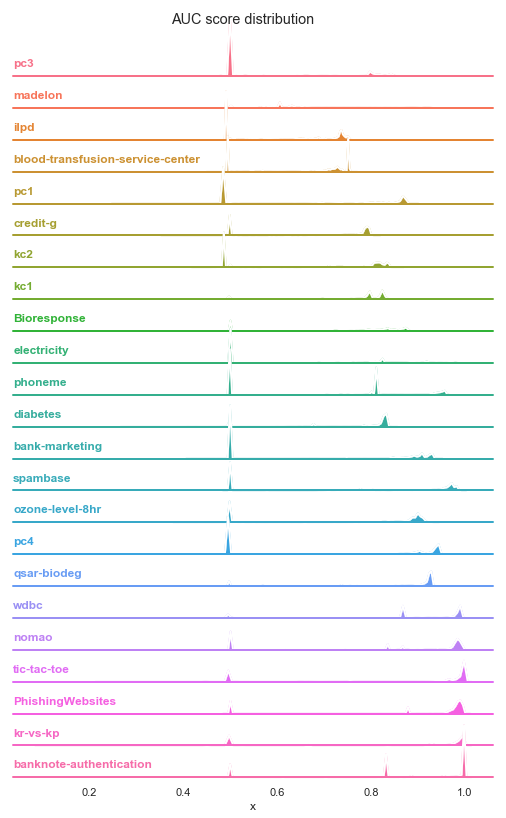

In [12]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.005)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.005)
g.map(pyplot.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = pyplot.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, 
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.5)

# Remove axes details that don't play will with overlap
g.set(yticks=[])
g.set_titles("")
g.fig.suptitle('AUC score distribution')
g.fig.subplots_adjust(top=.98)
g.despine(bottom=True, left=True);

In [13]:
# All uploaders

tasks = []
all_scores = []
benchmark_suite = oml.study.get_study('OpenML-CC18','tasks') # obtain the 73 tasks

for count, task_id in enumerate(benchmark_suite.tasks): # iterate over all tasks to fetch their evaluations
    print("Fetching evaluations for task ",task_id,"-",count,"%")
    try:
        evaluations = list_all(oml.evaluations.list_evaluations, task=[task_id], function='area_under_roc_curve')
        for id, e in evaluations.items():
            tasks.append(e.data_name)
            all_scores.append(e.value)
    except oml.exceptions.OpenMLServerException as e: # to be sure that no server/network issues occurred
        print("OpenML error:", str(e),"for task",task_id)

# Create dataframe and sort by median over individual tasks
df = pd.DataFrame(dict(x=all_scores, g=tasks))
df['g'] = pd.Categorical(df['g'], df.groupby(['g']).median().sort_values('x').index.tolist())
df.sort_values('g');

('Fetching evaluations for task ', 3, '-', 0, '%')
(110000, 'evaluations downloaded')
('Fetching evaluations for task ', 6, '-', 1, '%')
(22077, 'evaluations downloaded')
('Fetching evaluations for task ', 11, '-', 2, '%')
(10568, 'evaluations downloaded')
('Fetching evaluations for task ', 12, '-', 3, '%')
(8573, 'evaluations downloaded')
('Fetching evaluations for task ', 14, '-', 4, '%')
(8417, 'evaluations downloaded')
('Fetching evaluations for task ', 15, '-', 5, '%')
(10910, 'evaluations downloaded')
('Fetching evaluations for task ', 16, '-', 6, '%')
(8440, 'evaluations downloaded')
('Fetching evaluations for task ', 18, '-', 7, '%')
(8814, 'evaluations downloaded')
('Fetching evaluations for task ', 22, '-', 8, '%')
(8489, 'evaluations downloaded')
('Fetching evaluations for task ', 23, '-', 9, '%')
(8934, 'evaluations downloaded')
('Fetching evaluations for task ', 28, '-', 10, '%')
(8666, 'evaluations downloaded')
('Fetching evaluations for task ', 29, '-', 11, '%')
(11096, 

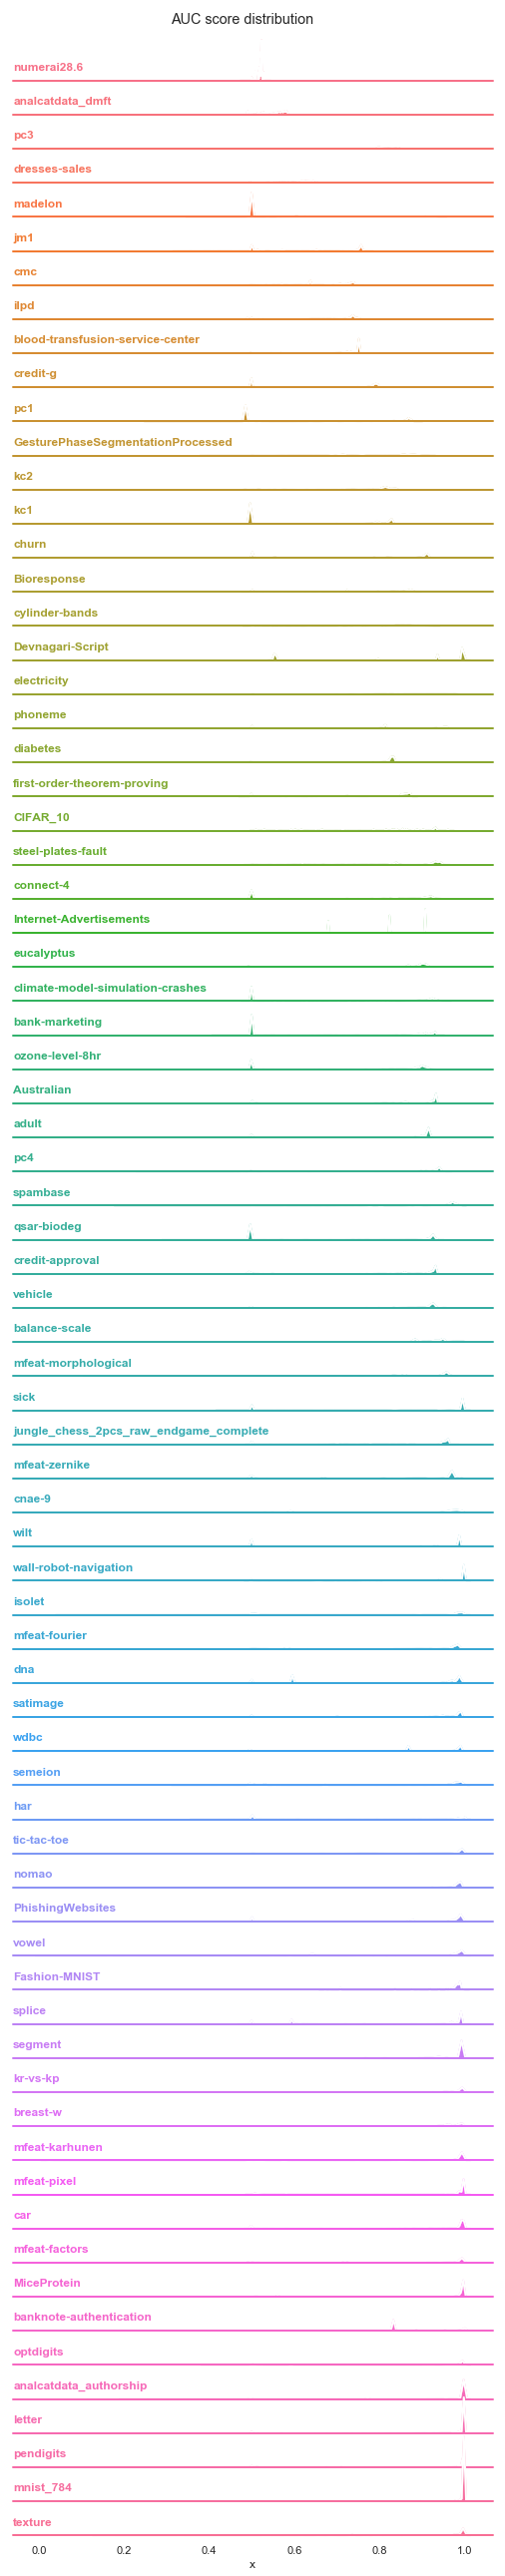

In [14]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.005)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.005)
g.map(pyplot.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = pyplot.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, 
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.5)

# Remove axes details that don't play will with overlap
g.set(yticks=[])
g.set_titles("")
g.fig.suptitle('AUC score distribution')
g.fig.subplots_adjust(top=.98)
g.despine(bottom=True, left=True);